In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1차원 데이터의 이산형 확률분포

In [2]:
# 1차원 이산확률분포
# 균형이 안 맞는 주사위로 예시를 들어봅시다.

x_set = np.array([1,2,3,4,5,6]) # 확률변수

def f(x): # 확률함수 정의
    if x in x_set:
        return x/21
    else: return 0

X = [x_set, f] # 확률분포. 확률변수가 취할 수 있는 값의 목록과 확률함수

In [3]:
prob = np.array([f(i) for i  in x_set])
display(prob)
dict(zip(x_set, prob)) # 확률변수와 그에 대응하는 확률

array([0.04761905, 0.0952381 , 0.14285714, 0.19047619, 0.23809524,
       0.28571429])

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

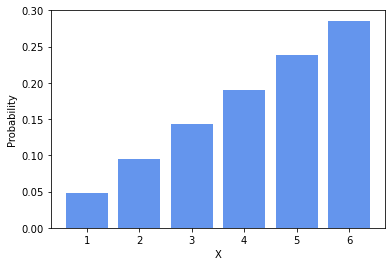

In [4]:
plt.figure(figsize=(6,4))
plt.bar(x_set, prob,color = 'cornflowerblue')
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()

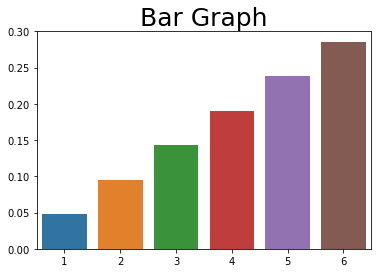

In [5]:
sns.barplot(x_set,prob)
plt.title('Bar Graph', fontsize=25)
plt.show()

In [6]:
# 확률은 0보다 작을 수 있을까?
np.all(prob<0)

False

In [7]:
# 확률의 총합은 얼마일까?
np.sum(prob).round(2)

1.0

In [8]:
# 누적분포함수
def F(x):
    return np.sum([f(i) for i in x_set if i<=x]) # x까지의 확률을 누적(x의 확률 포함)

F(6).round(2) # 마지막 x값까지의 누계는 확률 총합이니까

1.0

In [9]:
# 확률변수의 변환: 확률변수 X에 2를 곱하고 3을 더한 2X+3은 확률변수가 될까?

y_set = np.array([2*i + 3 for i in x_set]) # 확률변수를 변환
prob = np.array([f(i) for i in x_set]) # 변환한 확률변수도 기존 확률에 적용할 수 있나?
dict(zip(y_set, prob)) # 변환한 확률변수도 이전 확률에 적용 가능.

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [10]:
# 1차원 이산형 확률변수의 지표
# 평균: 확률변수의 평균은 확률변수의 중심을 나타내는 지표가 되며,
# 기댓값이라고도 부른다.
np.sum([i*f(i) for i in x_set])

4.333333333333333

In [11]:
# 확률변수의 기댓값은 확률변수를 무제한 시행하여 얻은 실현값의 평균
sample = np.random.choice(x_set, int(1e6), p = prob)
np.mean(sample)

4.331408

In [12]:
# 일반화
def E(X, g=lambda x:x): # g의 로직은 확률변수의 변환을 일반화한 것
    x_set, f = X # 확률변수와 확률함수를 묶어놓은 X에서 가져왔다
    return np.sum([g(i)*f(i) for i in x_set])
E(X)

4.333333333333333

In [13]:
E(X, g = lambda x:2*x+3)

11.666666666666664

In [14]:
# 기댓값의 선형성
2*E(X)+3
# 확률변수를 변환한 기댓값과, 기댓값을 확률변수와 동일한 로직으로 변환한 거나 같다

11.666666666666666

In [15]:
# 분산
mean = E(X) # 기댓값이 곧 평균
np.sum([(i-mean)**2 *f(i) for i in x_set])

2.2222222222222223

In [16]:
# 분산의 일반화
def V(X, g = lambda x:x):
    x_set,f = X
    mean = E(X,g)
    return np.sum([(g(i)-mean)**2 *f(i) for i in x_set])

V(X, lambda x:2*x+3)

8.88888888888889

In [17]:
# 분산은 선형적인가?
print(2*V(X)+3,'\n') # 그렇지 않다.
print(2**2*V(X)) # aX+b의 변환이라면 분산은 a^2V(X)
# 분산에서 상수는 어차피 편차라 똑같고, 분산은 제곱의 합이므로 a도 제곱해 줘야지

7.444444444444445 

8.88888888888889


## 2차원 데이터의 이산형 확률분포

In [18]:
# 2차원 이산형 확률분포
x_set = np.arange(2,13) # 불공정한 6면 주사위 2개를 굴려 나온 눈의 합
y_set = np.arange(1,7) # 불공정한 6면 주사위

In [19]:
# 확률함수 만들기 - 결합확률함수
def f_XY(x,y):
    if 1<=y<=6 and 1<=x-y<=6: # x는 2~12, y는 1~6. 주사위 2개의 눈금 범위
        return y*(x-y)/441 # 왜 441이냐 하면, 21*21이라서
                           # (y/21)*((x-y)/21)과 같은 모양새임
    else: return 0

In [20]:
# 확률분포 만들기
XY = [x_set, y_set, f_XY]

In [21]:
prob = np.array([[f_XY(x,y) for y in y_set] for x in x_set])
# 총 6*11개의 계산이 나와야 하기 때문에 6번 돌리는 작업을 11번 돌리는 이중 for문
display(prob.round(2), prob.shape)
# x를 먼저 돌릴지 y를 먼저 돌릴지 하는 건 걍 축 변경인 것 같음
# 요소는 똑같고 배치만 다른.

# 지금 여기선 y를 먼저 돌렸기 때문에 y가 컬럼에, x가 인덱스에 들어감
# x 먼저 돌리면 6행 11열로 출력됨

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.01, 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.01, 0.01, 0.  , 0.  ],
       [0.01, 0.02, 0.02, 0.02, 0.01, 0.  ],
       [0.01, 0.02, 0.03, 0.03, 0.02, 0.01],
       [0.  , 0.03, 0.03, 0.04, 0.03, 0.03],
       [0.  , 0.  , 0.04, 0.05, 0.05, 0.04],
       [0.  , 0.  , 0.  , 0.05, 0.06, 0.05],
       [0.  , 0.  , 0.  , 0.  , 0.07, 0.07],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.08]])

(11, 6)

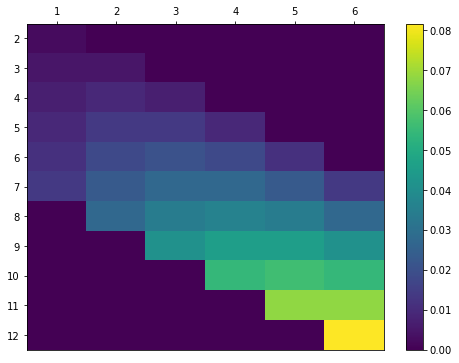

In [22]:
plt.figure(figsize=(8,6))
plt.pcolor(prob)                                # minor=False는 세부눈금 삭제
plt.xticks(np.arange(prob.shape[1]) + 0.5, y_set, minor=False) # y를 먼저 돌려서 y값을 x축에 표시
plt.yticks(np.arange(prob.shape[0]) + 0.5, x_set, minor=False) # ax 안 쓰면 라벨은 ticks와 함께 지장
plt.gca().invert_yaxis() # 객체 선언을 안 했기 때문에 gca()를 써서 임시 객체 선언
plt.gca().xaxis.tick_top()
plt.colorbar()
plt.show()

In [23]:
display(np.all(prob>=0),np.sum(prob))

True

1.0

In [24]:
# 주변확률분포: 확률변수 (X,Y)는 결합확률분포에 의해 동시에 정의되나,
# 개별 확률변수에만 흥미가 있다면 주변확률분포를 극딜하라.
# 확률변수 X만의 움직임, 즉 확률변수 X의 확률함수를 구하여 보자.

def f_X(x):
    return np.sum([f_XY(x,y) for y in y_set]) # x 고정, y만 움직임

def f_Y(y):
    return np.sum([f_XY(x,y) for x in x_set]) # y 고정, x만 움직임

# 확률분포 만들기
X = [x_set, f_X]
Y = [y_set, f_Y]
display(X,Y)

[array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <function __main__.f_X(x)>]

[array([1, 2, 3, 4, 5, 6]), <function __main__.f_Y(y)>]

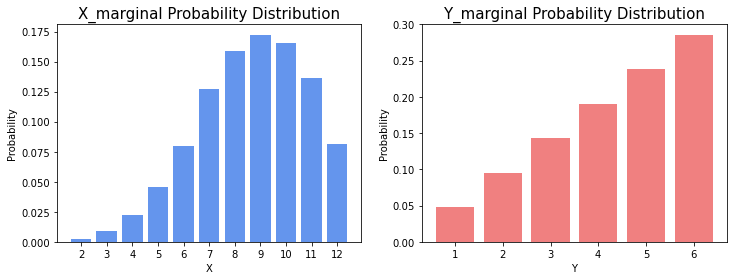

In [25]:
# 각각이 확률로서 잘 작동하는지 시각화해 보자.

prob_x = np.array([f_X(x) for x in x_set])
prob_y = np.array([f_Y(y) for y in y_set])

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x, color = 'cornflowerblue')
ax2.bar(y_set, prob_y, color = 'lightcoral')
ax1.set_xlabel('X')
ax1.set_ylabel('Probability')
ax2.set_xlabel('Y')
ax2.set_ylabel('Probability')
ax1.set_xticks(x_set)
ax2.set_xticks(y_set)
ax1.set_title('X_marginal Probability Distribution',fontsize=15)
ax2.set_title('Y_marginal Probability Distribution',fontsize=15)

plt.show()

In [26]:
# 2차원 이산형 확률분포의 지표
# 기댓값(확률변수의 평균)
np.sum([x*f_XY(x,y) for x in x_set for y in y_set])

8.666666666666666

In [27]:
# 위의 것이랑 똑같은 내용인데 표기 방식만 바꾼 것임
s = 0
for y in y_set:
    for x in x_set:
        s += x*f_XY(x,y)
s

8.666666666666666

In [28]:
# 2차원 이산형 확률변수 변환의 일반화
def E(XY, g):
    x_set, y_set, f_XY = XY # 결합함수와 확률변수의 분포
    return np.sum([g(x,y)*f_XY(x,y) for x in x_set for y in y_set])
display(E(XY, lambda x,y:x), E(XY, lambda x,y: y))
# 왜 기댓값이 2배냐 하면, 애초에 x는 주사위 2개의 합이고 y는 주사위 1개짜리거든...

8.666666666666666

4.333333333333333

In [29]:
# 선형성 체크
a,b = 2,3
display(
    E(XY, lambda x,y:a*x+b*y),
    E(XY, lambda x,y:a*x) + E(XY, lambda x,y: b*y))

30.333333333333332

30.33333333333333

In [30]:
# 분산: X의 분산이라면 X에 관한 편차 제곱의 기댓값(평균)으로 구할 수 있다
mean_X = E(XY, lambda x,y:x)
mean_Y = E(XY, lambda x,y: y)
np.sum([(x-mean_X)**2 * f_XY(x,y) for x in x_set for y in y_set])

4.444444444444444

In [31]:
# 분산의 일반화
def V(XY, g): # g는 변환식을 의미함
    x_set, y_set, f_XY = XY
    return np.sum([(g(x,y)-E(XY,g))**2 *f_XY(x,y)
                   for x in x_set for y in y_set])

In [32]:
# 분산 체크
var_X = V(XY, lambda x,y:x)
var_Y = V(XY, lambda x,y:y)
display(var_X,var_Y)

4.444444444444444

2.2222222222222223

In [33]:
# 공분산 구하기
def Cov(XY):
    x_set, y_set, f_XY = XY
    return np.sum([(x-mean_X)*(y-mean_Y) * f_XY(x,y)
                  for x in x_set for y in y_set])
Cov(XY)

2.222222222222222

In [34]:
# 분산과 공분산의 공식관계
display(
    V(XY, lambda x,y:a*x+b*y),
    a**2*var_X + b**2*var_Y + 2*a*b*Cov(XY))
# 약간 2차방정식과도 비슷한 모양새이다...

64.44444444444444

64.44444444444443

In [35]:
# 확률변수의 상관계수: 공분산을 각각의 표준편차로 나누어 산출
Cov(XY)/np.sqrt(var_X*var_Y)

0.7071067811865474

## 대표적인 이산형 확률분포

In [36]:
# 그래프를 위한 사용자 함수
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

linestyles = ['-', '--', ':']

def E(X,g = lambda x:x): # 기댓값(평균)
    x_set, f = X
    return np.sum([g(x)*f(x) for x in x_set])

def V(X,g = lambda x:x): # 분산
    x_set, f = X
    return np.sum([(g(x)-E(X,g))**2 * f(x) for x in x_set])

def check_prob(X): # 확률분포를 인수로 넣으면 기댓값과 분산을 반환해 주는 함수
    x_set, f = X
    prob = np.array([f(x) for x in x_set]) # 확률
    assert np.all(prob>=0), '확률은 음수일 수 없습니다.' # 조건식이 False일 때 출력됨
    prob_sum = (prob.sum()).round(6)
    assert prob_sum==1, f'확률의 총합은 1이어야 합니다. 현재 총합 {prob_sum}'
    print(f'기댓값: {(E(X)):.4}')
    print(f'분산: {(V(X)):.4}')
    
def plot_prob(X):
    # 확률분포를 인수로 가지며 그 확률변수의 확률함수와 기댓값을 그리기 위한 함수
    x_set, f = X # 선언 당하는 쪽이 왼쪽에 가면 됨. 선언 내용은 오른쪽.
    prob = np.array([f(x) for x in x_set])
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='Probability',color='cornflowerblue')
    ax.vlines(E(X),0,1,label='Mean', color='crimson') # 평균 안내선
    ax.set_xticks(np.append(x_set,E(X)))
    ax.set_ylim(0,prob.max()+0.3)
    ax.legend()
    plt.show()

### 베르누이 분포
$f(x) = p^x(1-p)^{(1-x)}$      $(x\in \{0,1\})$
- 가장 기본적인 이산형 확률분포로, 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포이다.
- 베르누이 분포를 따르는 확률변수의 시행을 '베르누이 시행'이라 하며,<br>1이 나오면 성공, 0이 나오면 실패인 두 가지 경우로 나뉜다.
- 예) 동전을 던져 앞면이 나올 확률, 주사위를 던져 6이 나오지 않을 확률

In [37]:
# 베르누이 분포를 만족하는 함수 작성
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
        else: return 0
    return x_set, f

In [38]:
# 성공할 확률이 30%, 0.3인 사건이 있다.
p = 0.3
X = Bern(p)
check_prob(X)

기댓값: 0.3
분산: 0.21


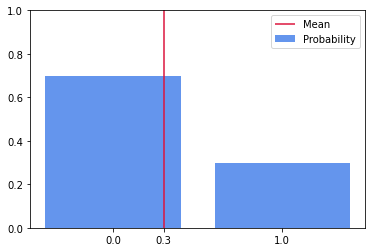

In [39]:
plot_prob(X)

In [40]:
rv = stats.bernoulli(p)
rv.pmf(0), rv.pmf(1) # probability math function, 확률 질량 함수(이산형에 적용)

(0.7, 0.3)

In [41]:
rv.pmf([0,1]) # 실패할 확률 0.7, 성공할 확률 0.3

array([0.7, 0.3])

In [42]:
# 누적밀도함수
rv.cdf([0,1]) # 누적이므로 최종값은 항상 1이다.

array([0.7, 1. ])

In [43]:
rv.mean(), rv.var()

(0.3, 0.21)

### 이항분포
$f(x) = _{n}\mathrm{C}_{x}p^x(1-p)^{(n-x)}$   $(x\in \{0,1,$$\cdots$$,n\})$<br>
$ _{n}\mathrm{C}_{x} =\frac{n!}{x!(n-x)!}$
- 성공확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포

In [44]:
from scipy.special import comb

def Bin(n,p):
    # 성공확률이 p인 베르누이 함수를 따르는 사건을 n번 시행했을 때
    # 그 성공 횟수가 따르는 분포
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x)*(p**x)*((1-p)**(n-x))
        else: return 0
    return x_set, f

In [45]:
n = 10
p = 0.3
X = Bin(n,p)
X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <function __main__.Bin.<locals>.f(x)>)

In [46]:
check_prob(X)

기댓값: 3.0
분산: 2.1


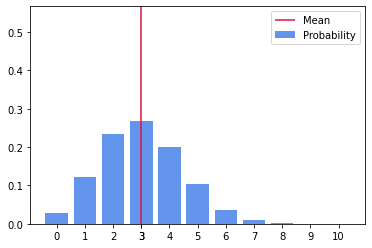

In [47]:
plot_prob(X)

### 기하분포
$f(x) = (1-p)^{(x-1)}p$ $(x \in \{1,2,3,$$\cdots$$\})$
- 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포<br>(성공할 때까지 반복하는 횟수이므로 확률변수의 최솟값은 0이 아닌 1이다.)
- 기하분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 $p$가 되며,<br>파라미터 p의 기하분포를 $Ge(p)$로 표기한다.
- 기하분포의 기댓값과 분산: $E(X) = \frac{1}{p}, V(X) = \frac{1-p}{p^2}$

### 포아송 분포
- 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포이며,<br>포아송 분포의 파라미터는 $\lambda$로 나타낸다.
- 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생건수는 $Poi(2)$를 따른다.<br>
    예) 하루에 교통사고가 1건도 발생하지 않을 확률<br>
    $P(X=0) = \frac{2!}{0!}*e^{-2} = 0.135$

- 포아송 분포의 기댓값과 분산은 모두 $\lambda$가 된다.<br>
$f(x) = \frac{\lambda^x}{x!}*e^{-\lambda}$ $(x \in \{0,1,2,$$\cdots$$\})$

In [48]:
# [과제] 동전을 10번 던져 앞면이 3번 나오는 확률의 이항분포의 기대값과 분산을 구하세요.

# 동전을 던져서 앞뒷면이 나올 각각의 확률은 0.5가 맞지만
# 여기선 성공을 동전의 앞면으로만 보고 나머지는 실패로 본다.
# 곧, 10번 시행하여 3번 성공하는 작업의 성공확률은 0.3이므로
# p=0.3이 되는 것이다.
n = 10
p = 0.3
def f(x):
    if x in x_set:
        return comb(n,x)*p**x*((1-p)**(n-x))
    else: return 0
print(f'동전을 10번 던져 앞면이 3번 나올 확률: {f(3)}\n')
print(f'''동전을 10번 던지는 이항분포의 기대값: {E(Bin(n,p))},
동전을 10번 던지는 이항분포의 분산: {V(Bin(n,p))}''')
check_prob(Bin(n,p))

동전을 10번 던져 앞면이 3번 나올 확률: 0.2668279319999998

동전을 10번 던지는 이항분포의 기대값: 2.9999999999999982,
동전을 10번 던지는 이항분포의 분산: 2.099999999999999
기댓값: 3.0
분산: 2.1


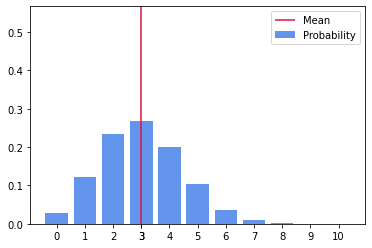

In [49]:
# [과제] 상기 이항분포의 확률함수와 기댓값을 시각화하세요.
plot_prob(Bin(n,p))

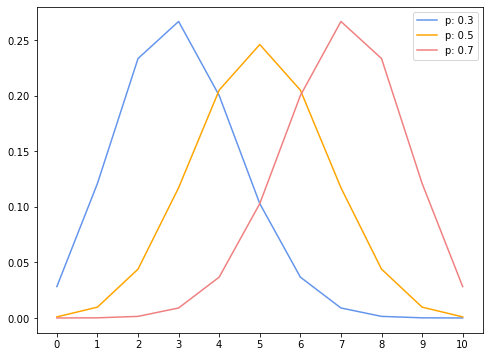

In [50]:
# [과제] 확률이 0.3, 0.5, 0.7로 변할 때 확률함수가 변하는 모습을 시각화하세요.
from scipy import stats
x_set = np.arange(n+1) # 이 x_set가 x의 집합임.
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for p, color in zip([0.3, 0.5, 0.7],['cornflowerblue','orange','lightcoral']):
    rv = stats.binom(n,p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p: {p}',
            color=color)
    # 뭔 말이냐 하면, x_set의 값이 발생할 확률을 y축에 표시하란 뜻임.
    # 그리고 그 확률은 위에서 만든 이항분포를 따르고.
ax.set_xticks(x_set)
ax.legend()
plt.show()

In [51]:
# [과제] 기하분포의 사용자 함수를 구하세요.
# 단, 확률변수를 1 이상 29 이하인 정수로 설정
def Ge(p):
    x_set = np.arange(1,30)
    # 성공할 때까지이므로 문제에서 반드시 변수의 범위를 지정해 줘야 함.
    # 물론 실생활에서는 저렇게 범위가 정해지진 않는다. 무제한이라고 생각하면 됨.
    def f(x):
        if x in x_set:
            return ((1-p)**(x-1))*p
        else: 0
    return x_set, f

In [52]:
# [과제] 성공확률이 0.5일 때의 기하분포의 기댓값과 분산을 구하세요.
print(f'''기하분포의 기댓값: {E(Ge(0.5)).round(3)}
기하분포의 분산: {V(Ge(0.5)).round(3)}''')
check_prob(Ge(0.5))

기하분포의 기댓값: 2.0
기하분포의 분산: 2.0
기댓값: 2.0
분산: 2.0


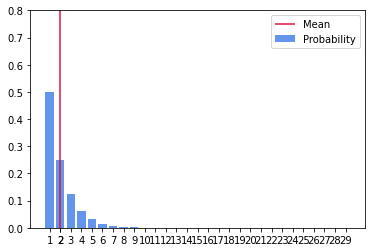

In [53]:
# 상기 기하분포의 확률함수와 기댓값을 시각화하세요.
plot_prob(Ge(0.5)) # 지수함수적으로 변화

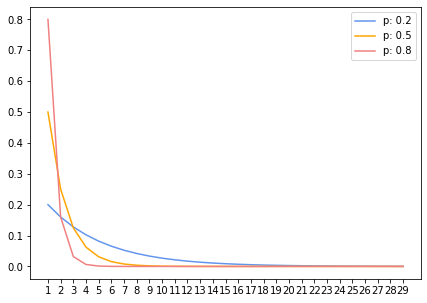

In [54]:
# [과제] 성공확률이 0.2, 0.5, 0.8로 변할 때 확률함수가 변화는 모습을 시각화 하세요
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
for p, color in zip([0.2, 0.5, 0.8],['cornflowerblue','orange','lightcoral']):
    rv = stats.geom(p)
    x_set = np.arange(1,30)
    ax.plot(x_set, rv.pmf(x_set),label=f'p: {p}',
           color = color)
ax.set_xticks(x_set)
plt.legend()
plt.show() # 이것 역시 지수적으로 감소

In [55]:
# [과제] 포아송 분포의 사용자 함수를 구하세요.
# 단, 확률변수를 0 이상 19 이하인 정수로 설정
# 이거 문제 범위가 잘못된 것 같음. 1 이상이 아니라 0 이상이어야 함.
# 범위를 1부터로 하면 확률 총합이 1이 아니게 되어서 assert 작동하고 함수 실행 안 됨.
# 교재에도 확률변수 x의 범위는 0부터로 시작함.
from scipy.special import factorial

def Poi(lamb):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return ((lamb**x)/factorial(x))*np.exp(-lamb)
        else: return 0
    return x_set, f

In [56]:
# [과제] 𝜆가 3일 때의 포아송분포의 기댓값과 분산을 구하세요.
print(f'''포아송 분포의 기댓값: {E(Poi(3)).round(3)}
포아송 분포의 분산: {V(Poi(3)).round(3)}''')
check_prob(Poi(3))

포아송 분포의 기댓값: 3.0
포아송 분포의 분산: 3.0
기댓값: 3.0
분산: 3.0


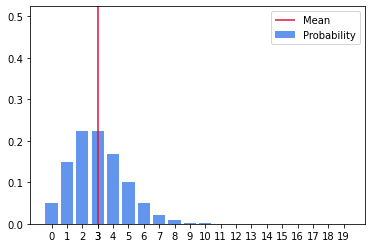

In [57]:
# [과제] 상기 포아송분포의 확률함수와 기댓값을 시각화하세요.
plot_prob(Poi(3))

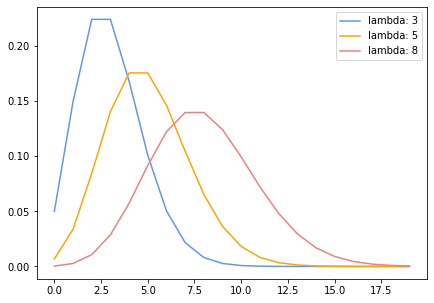

In [58]:
# [과제] 𝜆가 3, 5, 8로 변할 때 확률함수가 변하는 모습을 시각화하세요.

x_set = np.arange(20)
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

for lamb, color in zip([3,5,8],['cornflowerblue','orange','lightcoral']):
    rv = stats.poisson(lamb)
    ax.plot(x_set, rv.pmf(x_set), label=f'lambda: {lamb}',
           color = color)
plt.legend()
plt.show()

#### [과제] 베르누이, 이항, 기하, 포아송분포의 사례를 각각 2개씩 제시 및 설명 하세요.
<br>
1. 베르누이

    베르누이 분포는 사건이 발생하거나 발생하지 않는 두 가지의 경우만을 가진다.
- 학생 중 아무나 택했을 때 그 사람이 남자일 확률
- 31가지 맛 아이스크림 중 아무거나 골랐을 때 초콜릿 맛일 확률
<br>
2. 이항
<br>


    이항분포는 베르누이 시행을 여러 번 했을 때 '성공 횟수'가 가지는 분포이다.
- 확률 30% 짜리 아이템 강화를 5번 시도했을 때 강화 성공횟수가 따르는 분포
- 10명에게 고백했을 때 3 사람만 승낙하는 상황에서 고백 성공횟수의 분포
<br>
3. 기하
<br>


    기하분포는 베르누이 시행에서 최초로 성공할 때까지 반복한 '시행 횟수'가 가지는 분포이다.
- 합격률 80%의 시험에 합격할 때까지 계속해서 도전해 합격할 확률
- 팝콘을 위로 던지고 입을 벌려 최초로 받아먹을 확률
<br>
4. 포아송
<br>


    포아송 분포는 임의의 사건이 단위 시간당 발생하는 건수가 가지는 확률분포이다.
- 일 평균 2번 컵을 깨뜨리는 고양이가 하루에 컵을 3번 깨뜨릴 확률
- 1시간마다 5개씩 팔리는 물건이 한 개도 팔리지 않을 확률

기댓값: 1.5
분산: 1.05


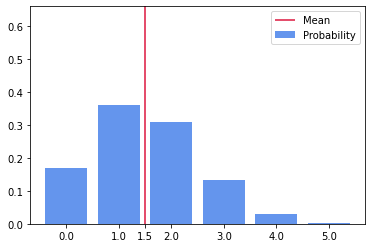

기댓값: 3.0
분산: 2.1


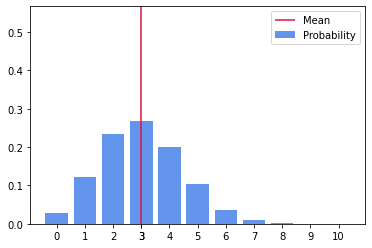

In [59]:
# 확률 30% 짜리 아이템 강화를 5번 시도했을 때 강화 성공횟수가 따르는 분포
# n=5, p=0.3일 때 모두 성공이면 5번째 막대그래프를 보면 된다.
# 성공횟수가 따르는 분포이니까.
check_prob(Bin(5,0.3))
plot_prob(Bin(5,.3))

# 10명에게 고백했을 때 3 사람만 승낙하는 상황에서 고백 성공횟수의 분포
check_prob(Bin(10,0.3))
plot_prob(Bin(10,0.3))

기댓값: 1.25
분산: 0.3125


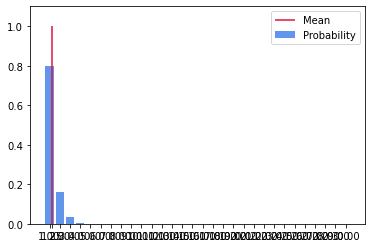

기댓값: 2.5
분산: 3.75


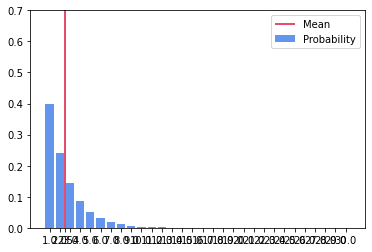

In [60]:
def Ge(p):
    x_set = np.arange(1,31)
    # 성공할 때까지이므로 문제에서 반드시 변수의 범위를 지정해 줘야 함.
    # 물론 실생활에서는 저렇게 범위가 정해지진 않는다. 무제한이라고 생각하면 됨.
    def f(x):
        if x in x_set:
            return ((1-p)**(x-1))*p
        else: 0
    return x_set, f

# 합격률 80%의 시험에 합격할 때까지 계속해서 도전해 합격할 확률
check_prob(Ge(0.8)) # 1~2번 안에 합격할 확률이 가장 높다
plot_prob(Ge(0.8))
# 팝콘을 위로 던지고 입을 벌려 받아먹는 확률 40%의 행위에 대해 최초로 받아먹을 확률
check_prob(Ge(0.4)) # 보통 2~3번 안에 받아먹기 성공하더라
plot_prob(Ge(0.4))

기댓값: 2.0
분산: 2.0


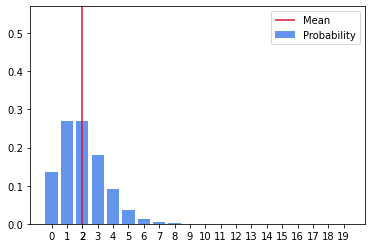

AssertionError: 확률은 음수일 수 없습니다.

In [61]:
# 일 평균 2번 컵을 깨뜨리는 고양이가 하루에 컵을 3번 깨뜨릴 확률
check_prob(Poi(2))
plot_prob(Poi(2)) # 여기서 3의 확률값을 보면 됨
# 1시간마다 5개씩 팔리는 물건이 한 개도 팔리지 않을 확률
check_prob(Poi(5))
plot_prob(Poi(5))